In [2]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification
import torch
import re

In [3]:
tokenizer = AutoTokenizer.from_pretrained('nlptown/bert-base-multilingual-uncased-sentiment')

model = AutoModelForSequenceClassification.from_pretrained('nlptown/bert-base-multilingual-uncased-sentiment')

Downloading:   0%|          | 0.00/39.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/953 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/872k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/112 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/669M [00:00<?, ?B/s]

C:\Users\malic\AppData\Roaming\Python\Python310\site-packages\torch\serialization.py:953: UserWarning: Failed to initialize NumPy: module compiled against API version 0x10 but this version of numpy is 0xf (Triggered internally at ..\torch\csrc\utils\tensor_numpy.cpp:77.)
  obj = cast(Storage, torch.UntypedStorage(nbytes))


In [60]:
tokens = tokenizer.encode('Fully satisfied take it now after a month from the purchase The product is really good in the original box with battery charger and transparent covers included Absence of headphones By turning on it you can immediately notice its good quality excellent joke and speed in performance The quality of the camera is good obviously not excellent  but for this price it is fine is perfect In the whole an excellent product purchased following reviews of very satisfied friends of the brand For this I purchased two one black and one blue shaded white for my parents Excellent quality and priceFully satisfied take it now after a month from the purchase The product is really good in the original box with battery charger and transparent covers included Absence of headphones By turning on it you can immediately notice its good quality excellent joke and speed in performance The quality of the camera is good obviously not excellent  but for this price it is fine is perfect In the whole an excellent product purchased following reviews of very satisfied friends of the brand For this I purchased two one black and one blue shaded white for my parents Excellent quality and price', return_tensors='pt')

In [61]:
result = model(tokens)

In [62]:
result.logits

tensor([[-1.6389, -1.1610, -0.2073,  1.1566,  1.4836]],
       grad_fn=<AddmmBackward0>)

In [59]:
int(torch.argmax(result.logits))+1

5

In [9]:
import numpy as np
import pandas as pd

In [10]:
a=pd.read_excel("removed3.xlsx")

In [55]:
a['Reviews'].iloc[12050]

'I loved the cell phone Hes even better than I imagined He launched it ahead of time but he came wrong I bought it blue but it came white I bought with my cell phone an anti shock case but came ordinary capinha also bought flexible gel film but did not come'

In [14]:
def sentiment_score(review):
    tokens = tokenizer.encode(review, return_tensors='pt')
    result = model(tokens)
    return int(torch.argmax(result.logits))+1

In [15]:
sentiment_score(a)

3

In [76]:
a = a.drop(columns='sentiment')

In [77]:
a.columns

Index(['rating', 'Reviews'], dtype='object')

In [78]:
a['sentiment'] = a.loc[a['Reviews'].notna(), 'Reviews'].apply(lambda x: sentiment_score(x[:512]))

In [79]:
a

,rating,Reviews,sentiment
0,5,Very high quality and beautiful Amazon is more...,5.0
1,5,The product is really excellent although it re...,4.0
2,5,Price is a very good choice in terms of perfor...,5.0
3,5,Thanks to Amazon Turkey before the product I g...,5.0
4,5,I got it very quickly It was very well preserv...,5.0
...,...,...,...
13074,4,Good price and quality,4.0
13075,5,It is an excellent product It arrived complete...,5.0
13076,5,Team fully sealed and in perfect condition rec...,5.0
13077,5,I loved it better cost benefit,5.0


In [80]:
a.to_excel("bert1.xlsx")

In [81]:
a['sentiment'].value_counts()

5.0    7462
4.0    3327
3.0    1135
1.0     625
2.0     528
Name: sentiment, dtype: int64

<AxesSubplot: >

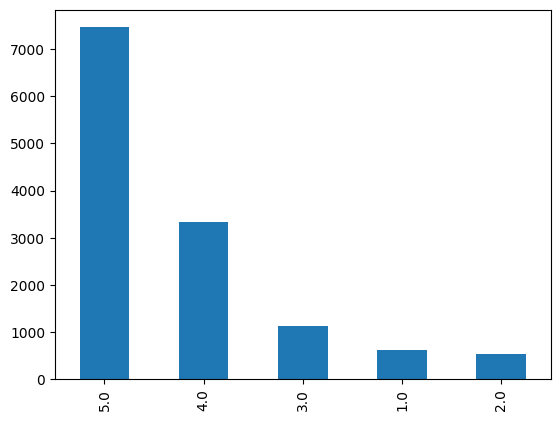

In [82]:
a["sentiment"].value_counts().plot(kind="bar")